In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [47]:
q_result = session.query(Measurement.date,func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
filter(Measurement.date>="2017-03-01").\
filter(Measurement.date<="2017-04-01").\
group_by(Measurement.date).\
order_by(Measurement.date.desc()).all()

lst = []
for q in q_result:
    dic={}
    dic["date"]=q[0]
    dic["TMIN"]=q[1]
    dic["TAVG"]=q[2]
    dic["TMAX"]=q[3]
    lst.append(dic)
lst

[{'date': '2017-04-01', 'TMIN': 69.0, 'TAVG': 75.5, 'TMAX': 80.0},
 {'date': '2017-03-31', 'TMIN': 71.0, 'TAVG': 75.28571428571429, 'TMAX': 78.0},
 {'date': '2017-03-30', 'TMIN': 73.0, 'TAVG': 76.16666666666667, 'TMAX': 78.0},
 {'date': '2017-03-29', 'TMIN': 68.0, 'TAVG': 73.0, 'TMAX': 77.0},
 {'date': '2017-03-28', 'TMIN': 69.0, 'TAVG': 74.57142857142857, 'TMAX': 78.0},
 {'date': '2017-03-27', 'TMIN': 74.0, 'TAVG': 75.5, 'TMAX': 78.0},
 {'date': '2017-03-26', 'TMIN': 72.0, 'TAVG': 76.0, 'TMAX': 80.0},
 {'date': '2017-03-25', 'TMIN': 72.0, 'TAVG': 74.2, 'TMAX': 76.0},
 {'date': '2017-03-24', 'TMIN': 70.0, 'TAVG': 72.83333333333333, 'TMAX': 76.0},
 {'date': '2017-03-23', 'TMIN': 70.0, 'TAVG': 73.16666666666667, 'TMAX': 78.0},
 {'date': '2017-03-22', 'TMIN': 72.0, 'TAVG': 74.0, 'TMAX': 76.0},
 {'date': '2017-03-21', 'TMIN': 72.0, 'TAVG': 73.83333333333333, 'TMAX': 76.0},
 {'date': '2017-03-20', 'TMIN': 69.0, 'TAVG': 73.66666666666667, 'TMAX': 77.0},
 {'date': '2017-03-19', 'TMIN': 72.0, 

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [36]:
session.query(Station.name).all()

[('WAIKIKI 717.2, HI US'),
 ('KANEOHE 838.1, HI US'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('PEARL CITY, HI US'),
 ('UPPER WAHIAWA 874.3, HI US'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('WAIHEE 837.5, HI US'),
 ('HONOLULU OBSERVATORY 702.2, HI US'),
 ('MANOA LYON ARBO 785.2, HI US')]

# Exploratory Climate Analysis

Today's date: 2017-08-23
A year ago: 2016-08-23


<IPython.core.display.Javascript object>


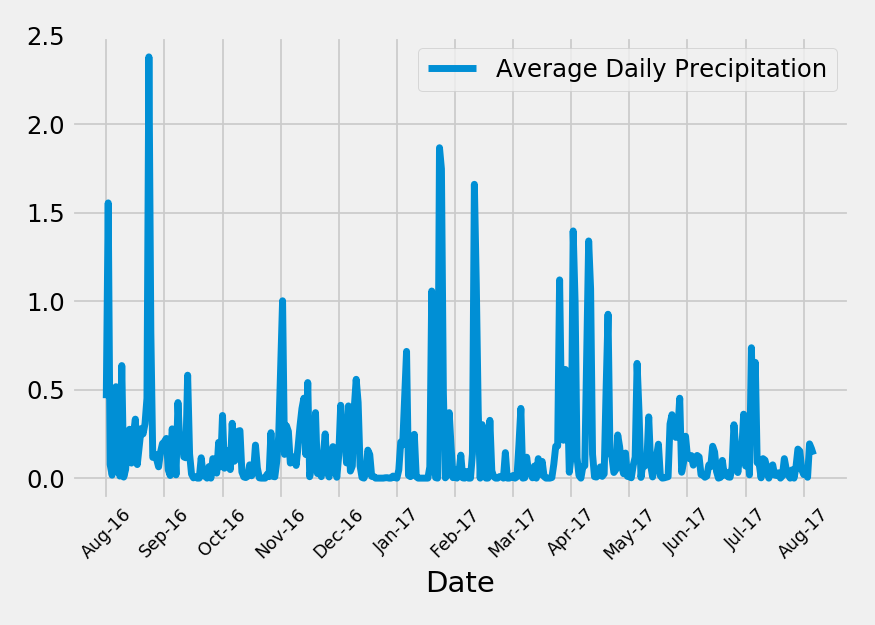

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# 1. Calculate the date 1 year ago from today
# dt_now = dt.date.today() # not data within the last one year from today
# print(dt_now)
dt_now = dt.date(year=2017,month=8,day=23) ## since the lastest record from the datebase was 2017-08-23, set it as the "today"
print(f"Today's date: {dt_now}")
dt_yearago = dt_now.replace(year = dt_now.year-1)
print(f"A year ago: {dt_yearago}")

# 2. Perform a query to retrieve the data and precipitation scores
prcp_list = session.query(Measurement.date,Measurement.prcp).\
order_by(Measurement.date).\
filter(Measurement.date>=dt_yearago).all()

# 3. Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_list,columns=["Date","Precipitation"])
prcp_df.set_index("Date",inplace=True)

# 4. calculate the average precipitation for each date
prcp_df_timeseries = prcp_df.groupby("Date").mean()

## Sort the dataframe by date
prcp_df_timeseries.sort_index(ascending=True,inplace=True)

# 5. Use Pandas Plotting with Matplotlib to plot the data
ax = plt.figure(figsize=(7,5)).add_subplot(111)
prcp_df_timeseries.plot(kind="line",ax=ax)

# create xticks---------------------------------------
locs, labels = plt.xticks()           # Get locations and labels

xlocs=[]
for i in range(13):
    xlocs.append(i*30)
    
xlabels=pd.date_range(start=dt_yearago, end=dt_now+dt.timedelta(days=30),freq='M')
xlabels = [dt.datetime.strftime(x,"%b-%y") for x in xlabels]

plt.xticks(xlocs,xlabels)   # Set locations and labels
plt.xticks(rotation=45,fontsize=10)
#-----------------------------------------------------------------
plt.legend(["Average Daily Precipitation"],loc="best")
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(f"Summary for daily precipitation from all stations:\n{prcp_df.describe()}")
print("-"*50)
print(f"Summary for average daily precipitation:\n{prcp_df_timeseries.describe()}")

Summary for daily precipitation from all stations:
       Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
--------------------------------------------------
Summary for average daily precipitation:
       Precipitation
count     365.000000
mean        0.169987
std         0.295722
min         0.000000
25%         0.008571
50%         0.070000
75%         0.191667
max         2.380000


In [12]:
# How many stations are available in this dataset?
sta_num = session.query(func.count(func.distinct(Measurement.station))).scalar()
print(f"There are {sta_num} stations in this dataset")

There are 9 stations in this dataset


In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.
q_result = session.query(Measurement.station,func.count(Measurement.date)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.date).desc()).all()

MAS = q_result[0][0]

print(f"The most active station is {MAS}")
print("-"*50)
q_result

The most active station is USC00519281
--------------------------------------------------


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
q_result2 = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station==MAS).all()

print(f"Lowest temperature: {q_result2[0][0]} F")
print(f"Highest temperature: {q_result2[0][1]} F")
print(f"Average temperature: {q_result2[0][2]:.2f} F" )

Lowest temperature: 54.0 F
Highest temperature: 85.0 F
Average temperature: 71.66 F


The station with the highest number of temperature observations is USC00519281
--------------------------------------------------


<IPython.core.display.Javascript object>


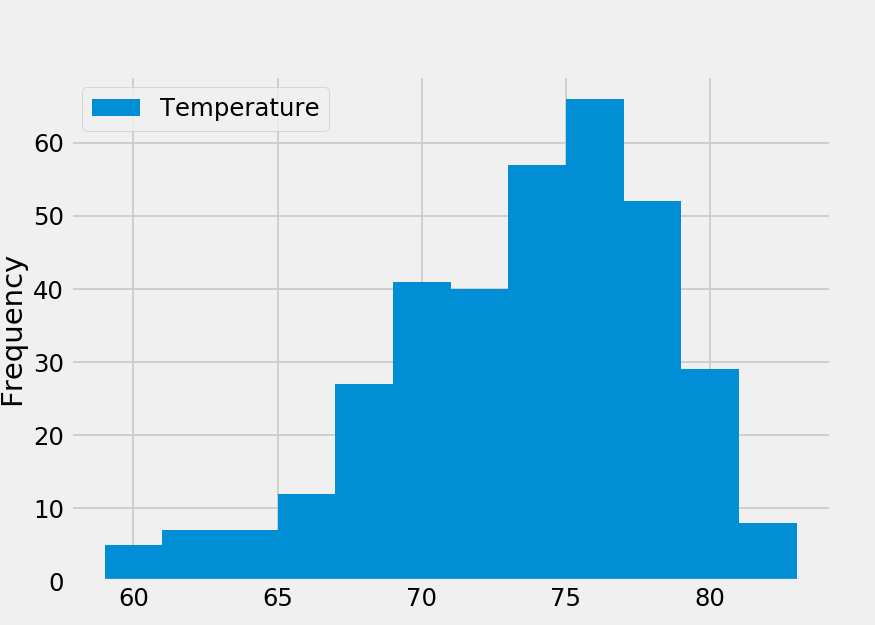

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# 1. Calculate the date 1 year ago from today - done above
# dt_now = dt.date(year=2017,month=8,day=23) 
# dt_yearago = dt_now.replace(year = dt_now.year-1)

# 2. find the station with the highest number of temperature observations.
q_result3 = session.query(Measurement.station,func.count(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.date).desc()).all()

MAS_temp = q_result[0][0]

print(f"The station with the highest number of temperature observations is {MAS_temp}")
print("-"*50)

# 3. Perform a query to retrieve the data and temperature data for the station found in step 2
temp_list = session.query(Measurement.date,Measurement.tobs).\
order_by(Measurement.date).\
filter(Measurement.date>dt_yearago).\
filter(Measurement.station==MAS_temp).all()

# 4. Save the query results as a Pandas DataFrame and set the index to the date column
temp_df = pd.DataFrame(temp_list,columns=["Date","Temperature"])
temp_df.set_index("Date",inplace=True)

## Sort the dataframe by date
temp_df.sort_index(ascending=True,inplace=True)

# 5. Use Pandas Plotting with Matplotlib to plot the data
ax = plt.figure(figsize=(7,5)).add_subplot(111)
temp_df.plot(kind="hist",ax=ax,bins=12)


In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# my trip: 2018/8/10-2018/8/13
start_date = dt.date(year=2017,month=8,day=10) 
end_date = dt.date(year=2017,month=8,day=23) 
f_result = calc_temps(start_date, end_date)

tmin= f_result[0][0]
tavg= f_result[0][1]
tmax= f_result[0][2]

print(f"Minimum temperature: {tmin} F")
print(f"Average temperature: {tavg:.1f} F" )
print(f"Maximum temperature: {tmax} F")

Minimum temperature: 70.0 F
Average temperature: 78.7 F
Maximum temperature: 85.0 F


<IPython.core.display.Javascript object>


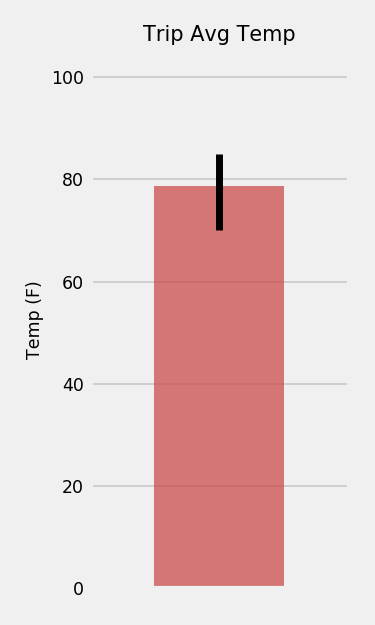

In [18]:
# Plot the results from your previous query as a bar chart. 
ax = plt.figure(figsize=(3,5)).add_subplot(111)

# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr=[[tavg-tmin],[tmax-tavg]]

# Use the average temperature for the y value
y=tavg

plt.bar(x=0,height=y,width=0.2,yerr=yerr,tick_label="",alpha=0.75,color=(0.8,0.3,0.3))

# formatting
plt.xlim(-0.2,0.2)
plt.ylim(0,105)
plt.grid(axis="x")
plt.yticks(fontsize=10)
plt.ylabel("Temp (F)",fontsize=10)
plt.title("Trip Avg Temp",fontsize=12)

plt.tight_layout()
plt.show()


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.

## my trip: 2018/8/10-2018/8/13
# start_date = dt.date(year=2017,month=8,day=10) 
# end_date = dt.date(year=2017,month=8,day=23) 

q_result4 = session.query(Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)).\
filter(Measurement.station==Station.station).\
filter(Measurement.date>=start_date).\
filter(Measurement.date<=end_date).\
group_by(Measurement.station).\
order_by(func.sum(Measurement.prcp).desc()).all() #sort in descending order by precipitation amount

station_prcp = pd.DataFrame(q_result4,columns=["Station","Name","Latitude","Longitude","Elevation","Total Precipitation"])
station_prcp



,Station,Name,Latitude,Longitude,Elevation,Total Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,3.00
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.51
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.34
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.04
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.02


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip

# 1. create a list contain my trip dates in %m-%d format
## my trip: 2018/8/10-2018/8/13
# start_date = dt.date(year=2017,month=8,day=10) 
dates=[]
for i in range(23-10+1):
    date=start_date+dt.timedelta(days=i)
    date_string=dt.datetime.strftime(date,"%m-%d")
    dates.append(date_string)

# 2. use the the daily_normals function to get the normal of each day, and push results into a list
normals=[]
for date in dates:
    normal = daily_normals(date)
    normal_list=[date,normal[0][0],normal[0][1],normal[0][2]]
    normals.append(normal_list)

normals

[['08-10', 65.0, 76.42, 83.0],
 ['08-11', 67.0, 75.98113207547169, 82.0],
 ['08-12', 67.0, 76.52727272727273, 83.0],
 ['08-13', 71.0, 76.98245614035088, 84.0],
 ['08-14', 71.0, 76.77777777777777, 82.0],
 ['08-15', 69.0, 76.47169811320755, 83.0],
 ['08-16', 69.0, 76.08, 83.0],
 ['08-17', 69.0, 76.125, 83.0],
 ['08-18', 70.0, 76.92307692307692, 84.0],
 ['08-19', 69.0, 75.94642857142857, 85.0],
 ['08-20', 68.0, 76.45283018867924, 82.0],
 ['08-21', 67.0, 76.4, 83.0],
 ['08-22', 69.0, 76.47169811320755, 84.0],
 ['08-23', 67.0, 76.6923076923077, 87.0]]

In [22]:
# Load the previous query results into a Pandas DataFrame
normal_df = pd.DataFrame(normals,columns=["Date","Min Temp","Avg Temp","Max Temp"])
normal_df.set_index("Date",inplace=True)

normal_df

,Min Temp,Avg Temp,Max Temp
Date,,,
08-10,65.0,76.420000,83.0
08-11,67.0,75.981132,82.0
08-12,67.0,76.527273,83.0
08-13,71.0,76.982456,84.0
08-14,71.0,76.777778,82.0
08-15,69.0,76.471698,83.0
08-16,69.0,76.080000,83.0
08-17,69.0,76.125000,83.0
08-18,70.0,76.923077,84.0


<IPython.core.display.Javascript object>


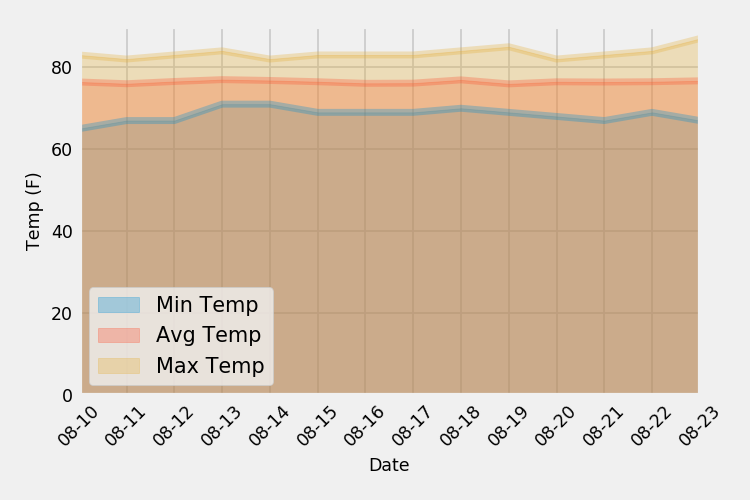

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
fig,ax = plt.subplots(figsize=(6,4))
normal_df.plot.area(ax=ax,stacked=False,alpha=0.3)

# formatting
plt.legend(loc="best",fontsize=12)
plt.grid(True)
plt.xlim(0,13)
plt.ylim(0,90)
plt.ylabel("Temp (F)",fontsize=10)
plt.xlabel("Date",fontsize=10)

plt.yticks(fontsize=10)
## set xticks to dates-----------------------------------------
xtick_loc = range(normal_df.count()[0])
plt.xticks(xtick_loc,normal_df.index,fontsize=10,rotation=45)
#--------------------------------------------------------------

plt.tight_layout()
plt.show()